##      **Playing Cards Image Classification**

# Downloading the Dataset
First, we need to install the Kaggle API and authenticate it to download the "Playing Cards Image" dataset.

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d gpiosenka/cards-image-datasetclassification
!unzip cards-image-datasetclassification.zip -d cards-image-dataset

Streaming output truncated to the last 5000 lines.
  inflating: cards-image-dataset/train/jack of spades/059.jpg  
  inflating: cards-image-dataset/train/jack of spades/060.jpg  
  inflating: cards-image-dataset/train/jack of spades/061.jpg  
  inflating: cards-image-dataset/train/jack of spades/062.jpg  
  inflating: cards-image-dataset/train/jack of spades/063.jpg  
  inflating: cards-image-dataset/train/jack of spades/064.jpg  
  inflating: cards-image-dataset/train/jack of spades/065.jpg  
  inflating: cards-image-dataset/train/jack of spades/066.jpg  
  inflating: cards-image-dataset/train/jack of spades/067.jpg  
  inflating: cards-image-dataset/train/jack of spades/068.jpg  
  inflating: cards-image-dataset/train/jack of spades/069.jpg  
  inflating: cards-image-dataset/train/jack of spades/070.jpg  
  inflating: cards-image-dataset/train/jack of spades/071.jpg  
  inflating: cards-image-dataset/train/jack of spades/072.jpg  
  inflating: cards-image-dataset/train/jack of spades

# Creating CSV files for train and test dataset :-

we are pre-processing the data and creating train_data.csv  and test_data.csv file with columns image_path and label for further processing:-


In [3]:
import os
import pandas as pd

# Directories for train and validation datasets
train_dir = '/content/cards-image-dataset/train'
valid_dir = '/content/cards-image-dataset/valid'

# Initialize lists to hold image paths and labels
image_paths = []
labels = []

# Function to process each directory (train or valid)
def process_directory(directory, label_list, path_list):
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for image_name in os.listdir(label_dir):
                if image_name.endswith('.jpg') or image_name.endswith('.png'):
                    image_path = os.path.join(label_dir, image_name)
                    path_list.append(image_path)
                    label_list.append(label)

# Process the train and valid directories
process_directory(train_dir, labels, image_paths)
process_directory(valid_dir, labels, image_paths)

# Create DataFrame and save to CSV
data = {'Image_Path': image_paths, 'Label': labels}
df = pd.DataFrame(data)

csv_file_path = '/content/cards-image-dataset/train_data.csv'
df.to_csv(csv_file_path, index=False)

print("CSV file for train and valid folders saved successfully!")

CSV file for train and valid folders saved successfully!


In [4]:
import os
import pandas as pd

# Directory for test dataset
test_dir = '/content/cards-image-dataset/test'

# Initialize lists to hold image paths and labels
test_image_paths = []
test_labels = []

# Function to recursively process the test directory
def process_test_directory(directory, label_list, path_list):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                image_path = os.path.join(root, file)
                path_list.append(image_path)
                label_list.append("Unknown")

# Process the test directory
process_test_directory(test_dir, test_labels, test_image_paths)

# Create DataFrame and save to CSV
test_data = {'Image_Path': test_image_paths, 'Label': test_labels}
test_df = pd.DataFrame(test_data)

test_csv_file_path = '/content/cards-image-dataset/test_data.csv'
test_df.to_csv(test_csv_file_path, index=False)

print("CSV file for test folder saved successfully!")

CSV file for test folder saved successfully!


# Importing Libraries :-

we need to import machine learning related API's for image processing , manipulating layers and model Xception , InceptionV3 and ResNet50V2 with pre-trained weights , pandas for reading csv files into dataframes and Matplotlib for creating visualizations, such as line plots, bar charts :-

In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import Xception  , DenseNet121 , MobileNetV2 , ResNet50V2  , InceptionV3
from keras import layers, models, optimizers

# Creating Data Generators for Image Classification
This code snippet summarizes the process of creating data generators for training and validation sets . It includes setting up image data augmentation for the training set (train_datagen) and scaling for the testing set (test_datagen), defining the batch size and target image size, and loading the dataset using the flow_from_directory method with categorical class mode for image classification tasks.

In [6]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/cards-image-dataset/train_data.csv')

train_df, val_df = train_test_split(df, train_size=0.8, test_size=0.2, random_state=42)
num_classes = len(df['Label'].unique())
print(num_classes)

53


In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
target_size = (224, 224)

In [8]:
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col='Image_Path',
                                                    y_col='Label',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(dataframe=val_df,
                                                        x_col='Image_Path',
                                                        y_col='Label',
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 6311 validated image filenames belonging to 53 classes.
Found 1578 validated image filenames belonging to 53 classes.


# Exploratory Data Analysis

In [ ]:
# Understand the dataset
print(train_df.head())
print(train_df.shape)
print(train_df.info())
print(train_df.describe())

                                             Image_Path              Label
7770  /content/cards-image-dataset/valid/four of spa...     four of spades
4743  /content/cards-image-dataset/train/seven of he...    seven of hearts
196   /content/cards-image-dataset/train/five of spa...     five of spades
4478  /content/cards-image-dataset/train/eight of he...    eight of hearts
3535  /content/cards-image-dataset/train/three of di...  three of diamonds
(6311, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 6311 entries, 7770 to 7270
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  6311 non-null   object
 1   Label       6311 non-null   object
dtypes: object(2)
memory usage: 147.9+ KB
None
                                               Image_Path           Label
count                                                6311            6311
unique                                               6311              53
top    

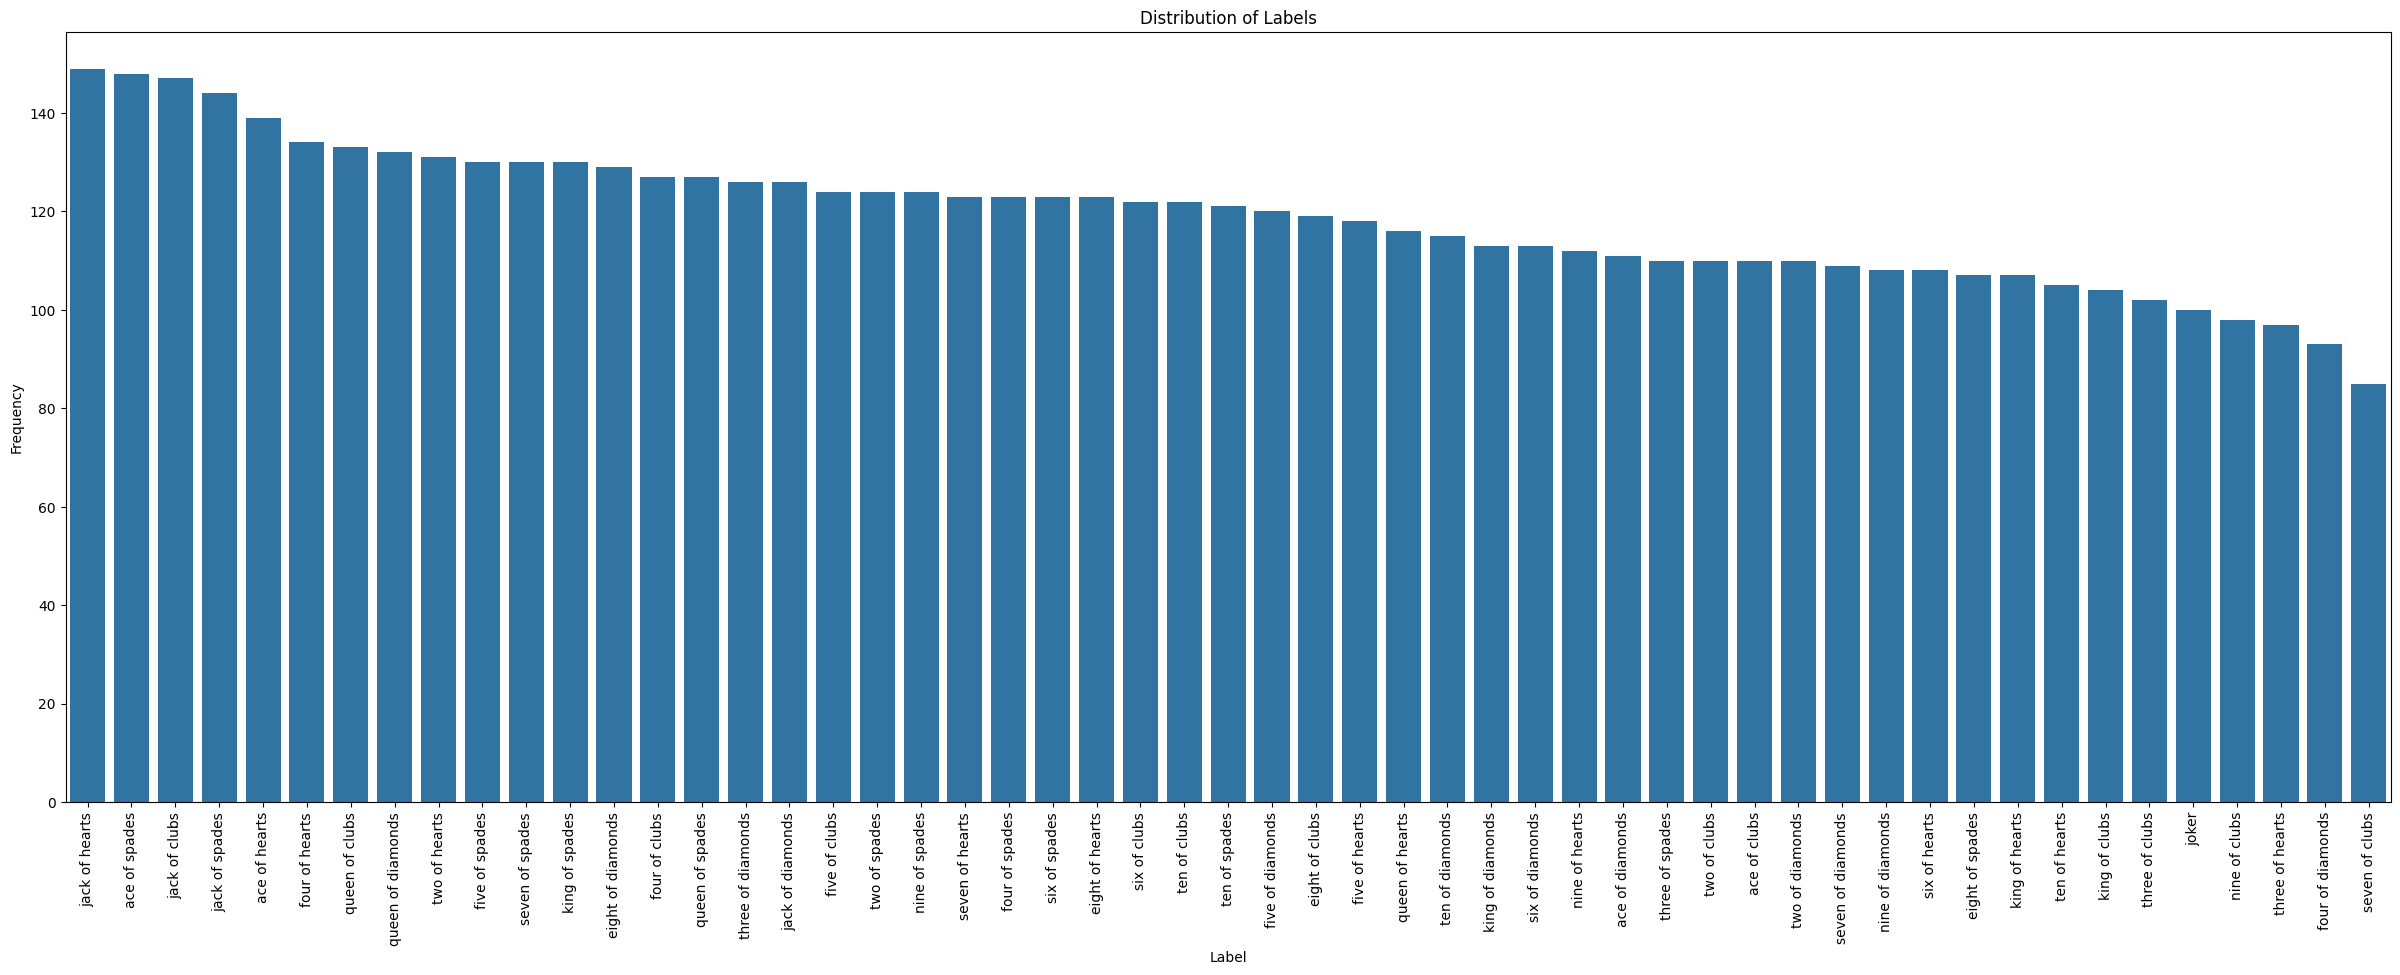

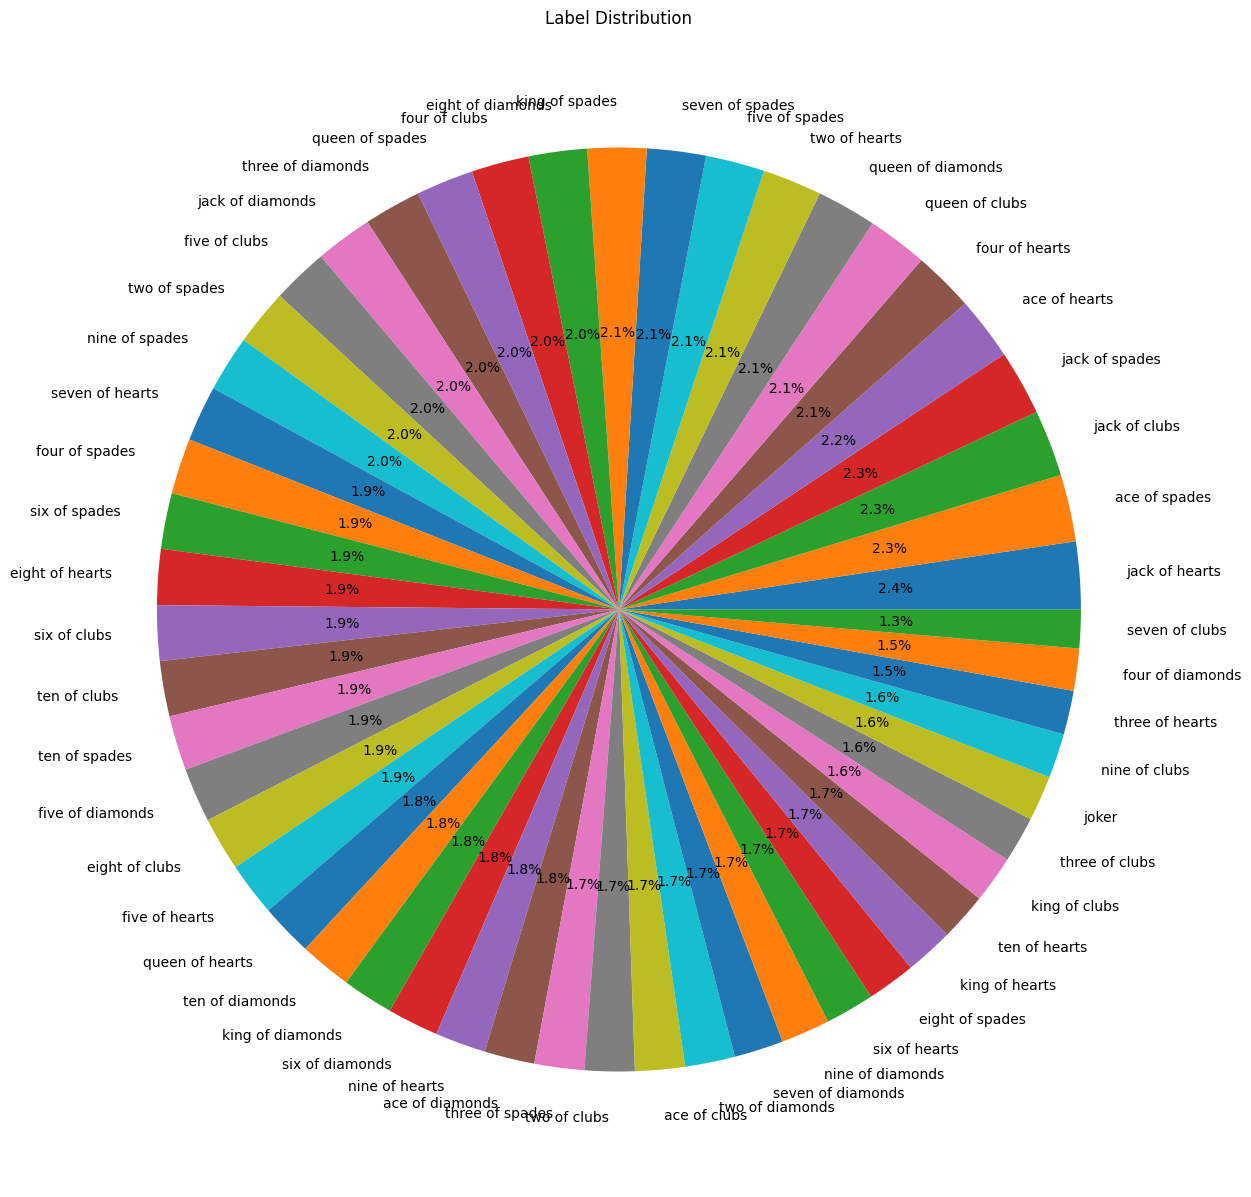

In [ ]:
# Bar chart for label distribution
plt.figure(figsize=(30, 10))
sns.countplot(data=train_df, x='Label', order=train_df['Label'].value_counts().index)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

# Pie chart for label distribution
plt.figure(figsize=(15, 15))
train_df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Label Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

Number of unique image paths: 6311


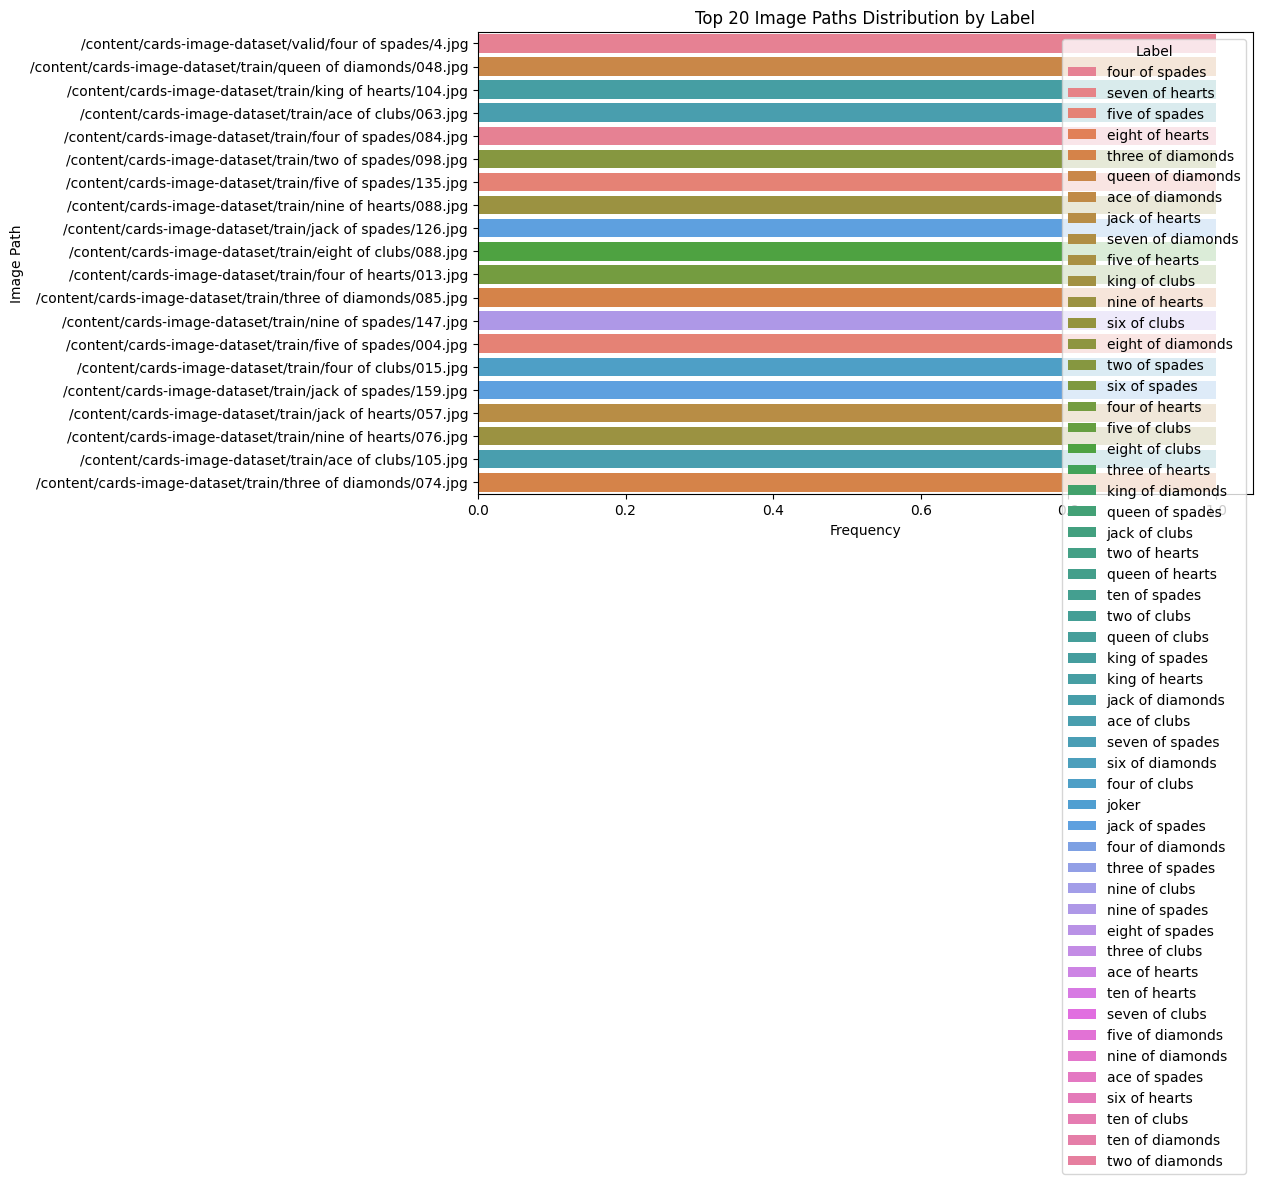

Column Image_Path has 6311 unique values.
Column Label has 53 unique values.


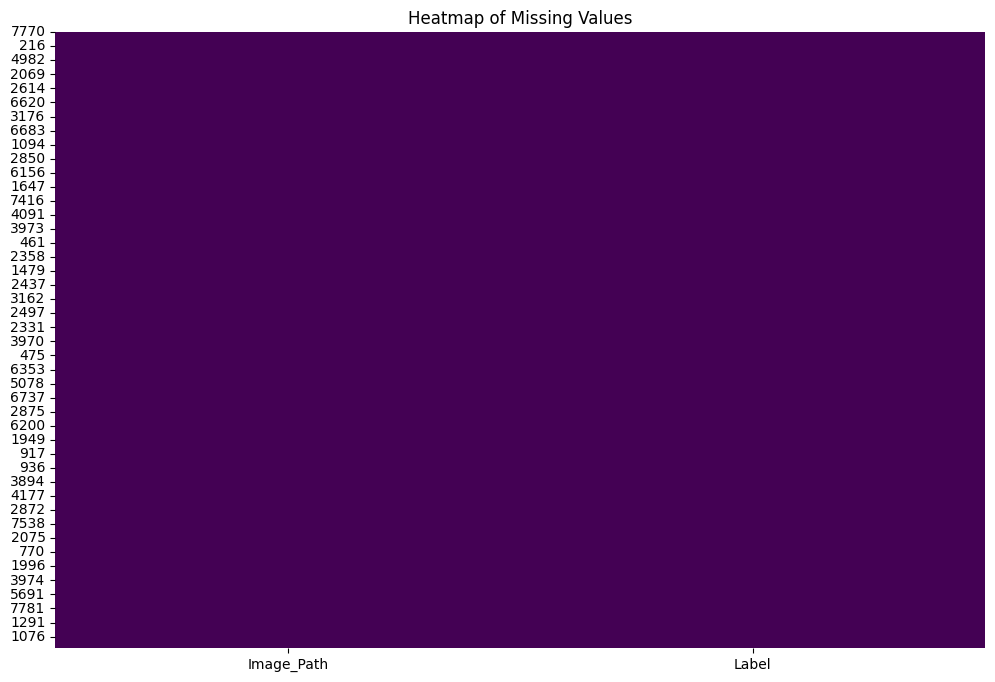

Label
jack of hearts       149
ace of spades        148
jack of clubs        147
jack of spades       144
ace of hearts        139
four of hearts       134
queen of clubs       133
queen of diamonds    132
two of hearts        131
five of spades       130
seven of spades      130
king of spades       130
eight of diamonds    129
four of clubs        127
queen of spades      127
three of diamonds    126
jack of diamonds     126
five of clubs        124
two of spades        124
nine of spades       124
seven of hearts      123
four of spades       123
six of spades        123
eight of hearts      123
six of clubs         122
ten of clubs         122
ten of spades        121
five of diamonds     120
eight of clubs       119
five of hearts       118
queen of hearts      116
ten of diamonds      115
king of diamonds     113
six of diamonds      113
nine of hearts       112
ace of diamonds      111
three of spades      110
two of clubs         110
ace of clubs         110
two of diamonds    

In [ ]:
# Count unique image paths
unique_paths = train_df['Image_Path'].nunique()
print(f"Number of unique image paths: {unique_paths}")

# Image paths distribution by label (top 20 paths for readability)
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, y='Image_Path', hue='Label', order=train_df['Image_Path'].value_counts().index[:20])
plt.title('Top 20 Image Paths Distribution by Label')
plt.xlabel('Frequency')
plt.ylabel('Image Path')
plt.show()

# Unique values for each categorical column
for column in train_df.select_dtypes(include=['object']).columns:
    unique_values = train_df[column].nunique()
    print(f"Column {column} has {unique_values} unique values.")

# Missing values heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Label counts summary
label_counts = train_df['Label'].value_counts()
print(label_counts)

In [ ]:
# Data Cleaning
print(train_df.isnull().sum())
train_df.fillna(method='ffill', inplace=True)
print(train_df.duplicated().sum())
train_df.drop_duplicates(inplace=True)

Image_Path    0
Label         0
dtype: int64
0


# Customizing model according to our usecase
This code snippet summarizes the process of creating a custom keras categorical classification model in Keras. It involves loading the pre-trained Xception , VGG16 and ResNet50  model, freezing its layers, adding custom layers for classification, compiling the model, shuffling the training data, and training the model. Finally, the trained model is saved as an HDF5 file .

In [9]:
from keras import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dense, GlobalAveragePooling2D

from keras.layers import Dropout

def create_model(base_model, input_shape, num_classes):
    base_model.trainable = True  # Unfreeze the base model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [10]:
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

def train_and_evaluate(model, train_data, val_data, model_name, epochs=10):
    # Compile the model
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model with the specified number of epochs
    history = model.fit(train_data,
                        validation_data=val_data,
                        steps_per_epoch=len(train_data),
                        epochs=epochs,
                        callbacks=[early_stopping])

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(val_data)
    print(f'{model_name} Validation Accuracy: {val_accuracy:.4f}')

    # Plot training history
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title(f'{model_name} Accuracy')
    plt.show()

    # Get the true labels and predictions
    val_data.reset()  # Reset the generator
    Y_pred = model.predict(val_data)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = val_data.classes

    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(30, 30))  # Increase the size of the plot significantly
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_data.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), xticks_rotation='vertical')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    return history

In [11]:
def model_training (base_models):
  # Directory to save the models
  save_dir = 'saved_models'
  if not os.path.exists(save_dir):
      os.makedirs(save_dir)

  # Adjustments for ResNet50
  # Train and evaluate each model
  histories = {}
  for base_model, input_shape, model_name in base_models:
      # Resize data if necessary (dummy data, so not applicable here)
      if input_shape != (224, 224, 3):
          # Resize X_train and X_val to the required input_shape
          # This is just a placeholder, implement actual resizing if needed
          pass

      # Create the model
      model = create_model(base_model, input_shape, num_classes)

      if model_name == 'ResNet50':
          # Unfreeze more layers for ResNet50 and adjust learning rate
          for layer in model.layers[-30:]:
              layer.trainable = True
          epochs = 17
          optimizer = optimizers.Adam(learning_rate=0.0001)
      else:
          epochs = 20
          optimizer = optimizers.Adam()

      # Compile the model
      model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

      print(f'Training {model_name}...')
      history = train_and_evaluate(model, train_generator, validation_generator, model_name, epochs=epochs)
      histories[model_name] = history

      # Saving the model after training
      model.save(os.path.join(save_dir, f'{model_name}_saved.h5'))
      print(f'Saved {model_name} model to {save_dir}/{model_name}_saved.h5')

# Loading the Base-Model
This code snippet defines Xception , ResNet50 and VGG16 base model in Keras. The model is configured with an input shape of (224, 224, 3) for VGG16 & ResNet50 and input shape of (299 , 299 , 3) for Xception to match the size and channels of the images in the dataset. It includes all layers of the MobileNetV2 model up to the final fully connected layers but excludes the last fully connected layer, which is often customized for specific tasks.

Training MobileNetV2...
Epoch 1/20
198/198 [==============================] - 108s 442ms/step - loss: 3.9647 - accuracy: 0.0439 - val_loss: 3.6900 - val_accuracy: 0.0748
Epoch 2/20
198/198 [==============================] - 87s 440ms/step - loss: 3.4041 - accuracy: 0.1253 - val_loss: 2.8666 - val_accuracy: 0.1857
Epoch 3/20
198/198 [==============================] - 87s 441ms/step - loss: 2.8562 - accuracy: 0.2104 - val_loss: 2.3357 - val_accuracy: 0.3352
Epoch 4/20
198/198 [==============================] - 88s 442ms/step - loss: 2.4526 - accuracy: 0.3090 - val_loss: 2.0494 - val_accuracy: 0.4373
Epoch 5/20
198/198 [==============================] - 87s 437ms/step - loss: 2.1289 - accuracy: 0.3949 - val_loss: 1.7796 - val_accuracy: 0.5349
Epoch 6/20
198/198 [==============================] - 89s 450ms/step - loss: 1.8124 - accuracy: 0.4817 - val_loss: 1.4266 - val_accuracy: 0.6071
Epoch 7/20
198/198 [==============================] - 85s 430ms/step - loss: 1.5962 - accuracy: 0.5478 - 

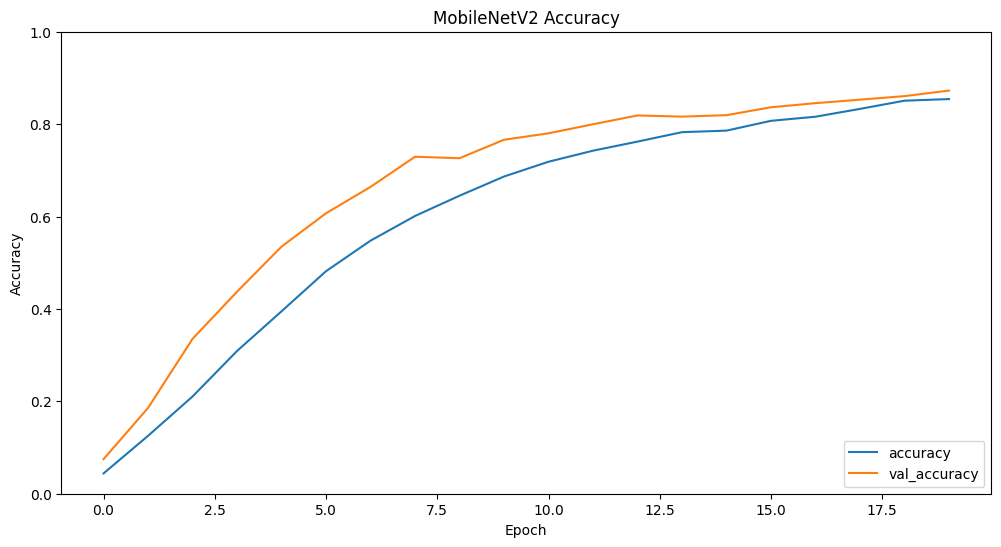

50/50 [==============================] - 4s 61ms/step


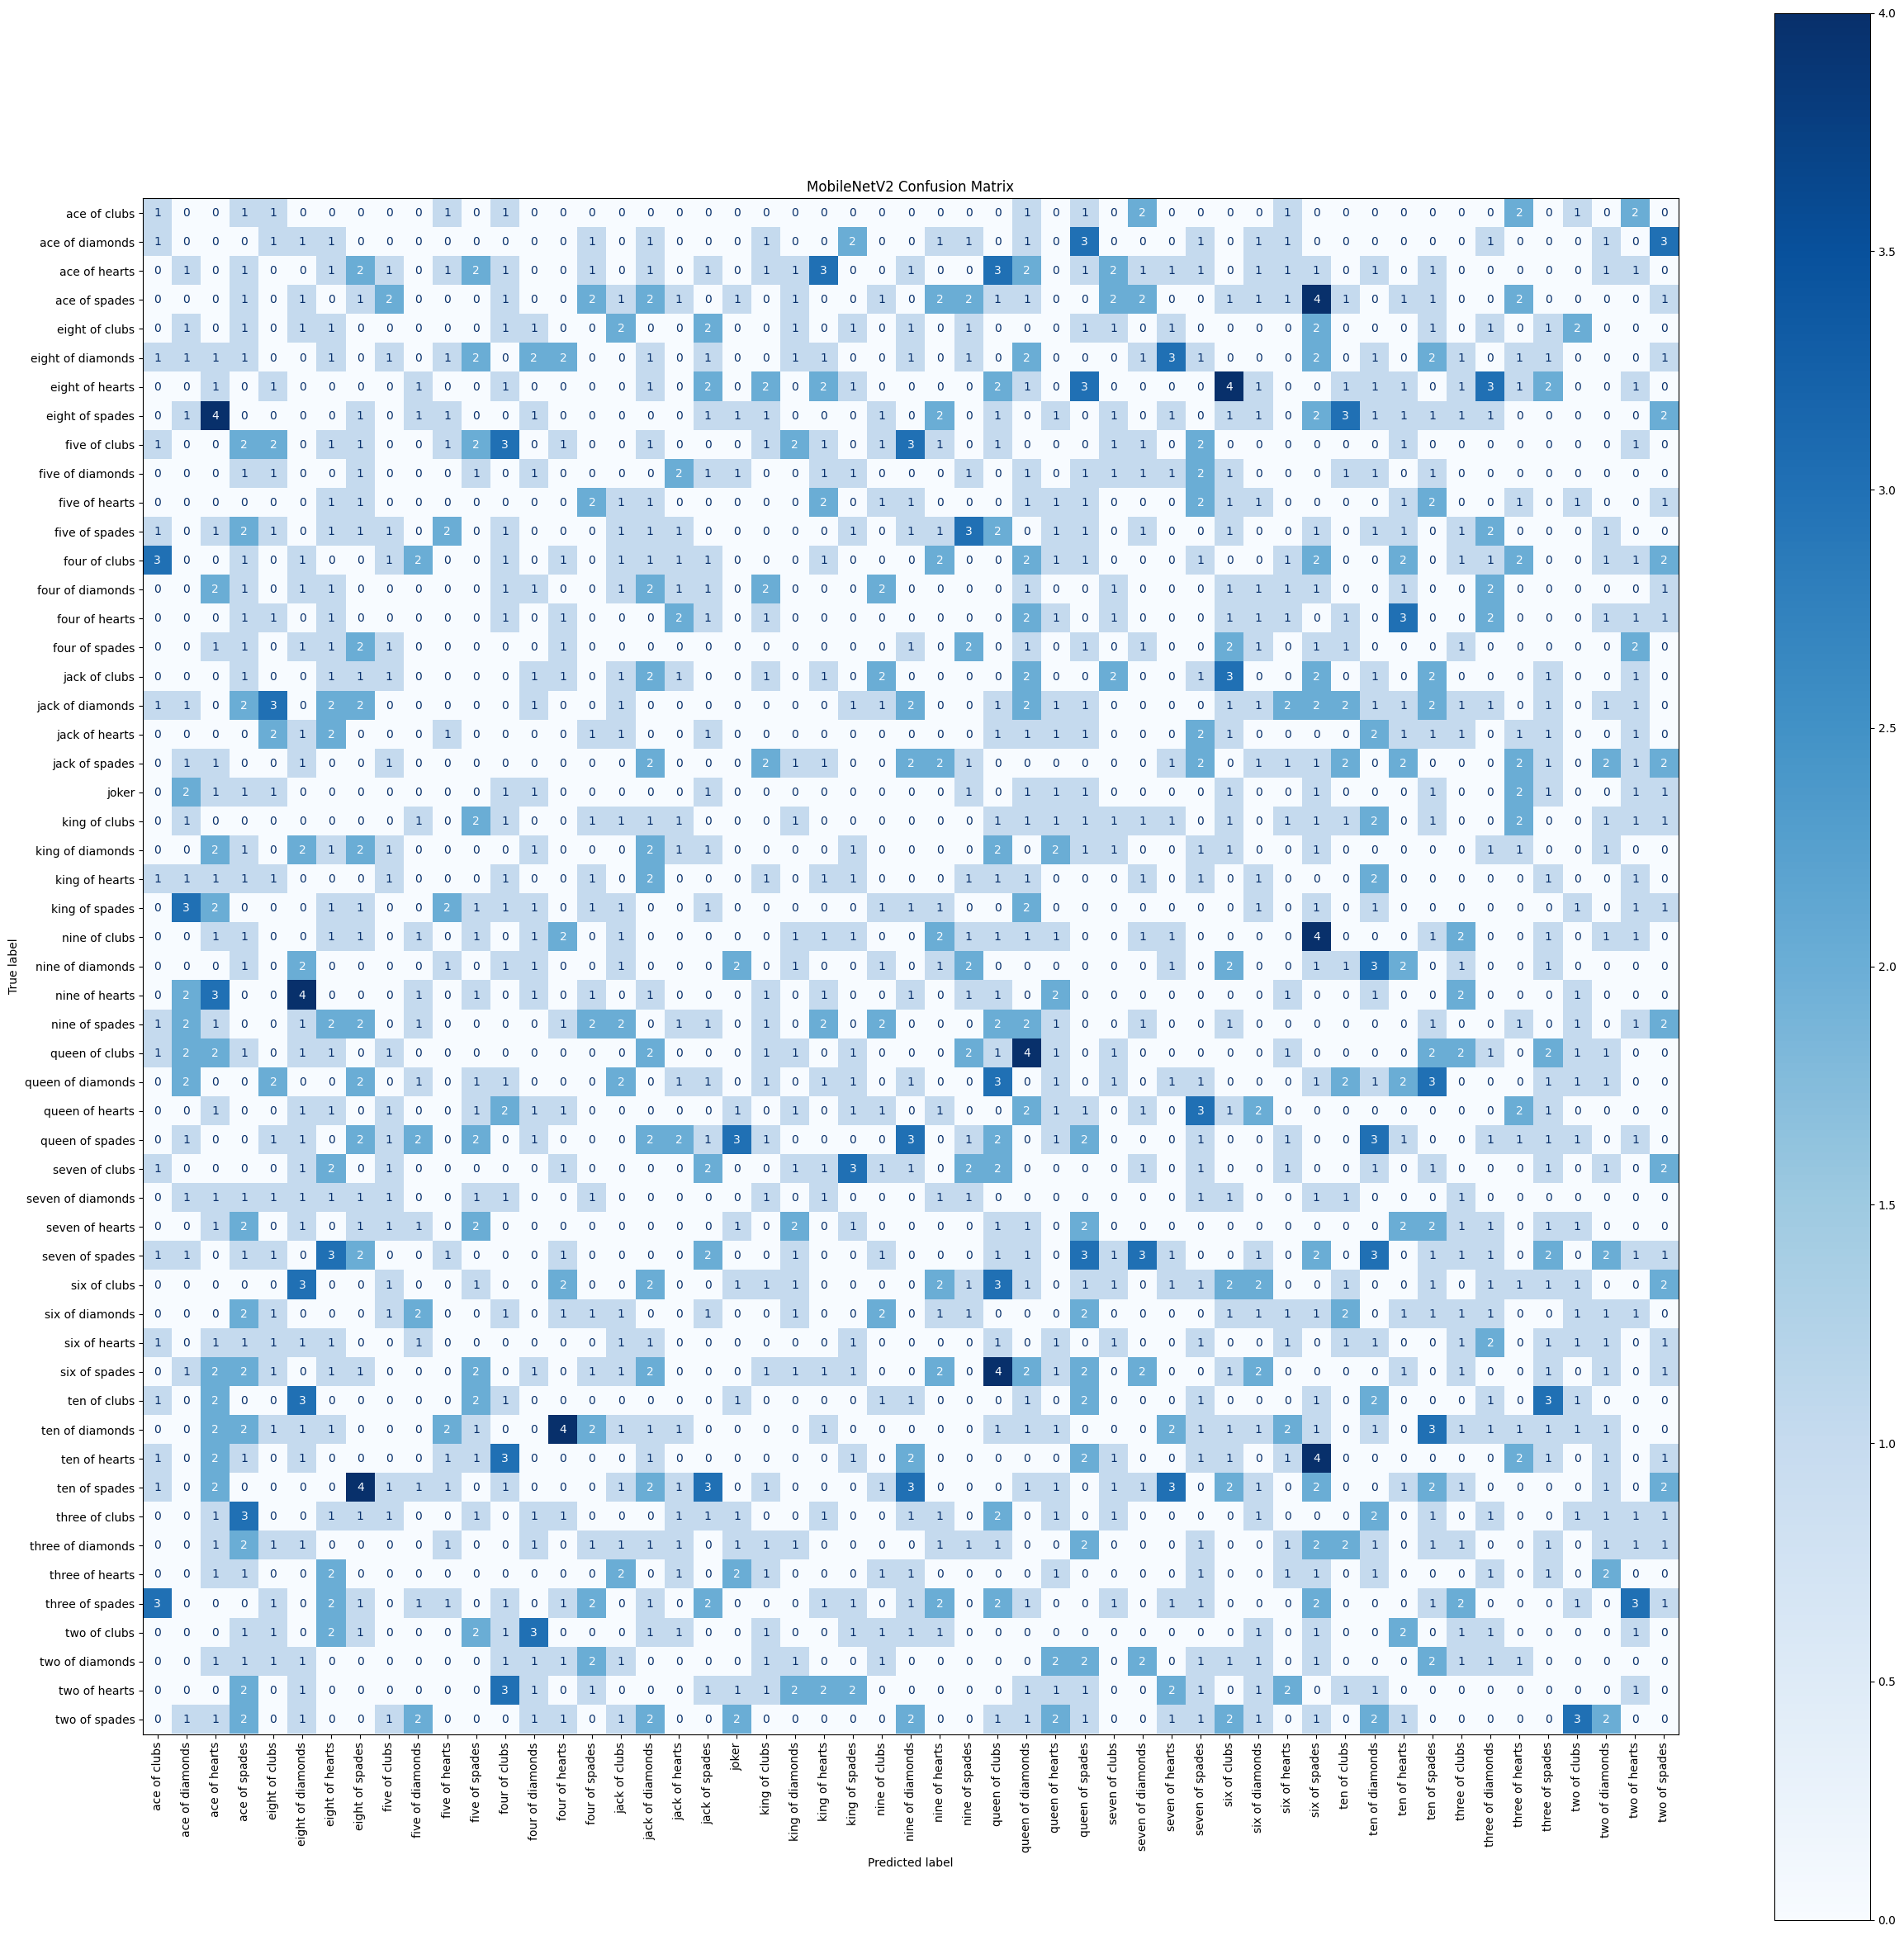

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved MobileNetV2 model to saved_models/MobileNetV2_saved.h5


In [ ]:
# List of base models with their respective input shapes
base_models1 = [
    (MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'MobileNetV2'),
]
model_training(base_models1)

87910968/87910968 [==============================] - 0s 0us/step
Training InceptionV3...
Epoch 1/20
198/198 [==============================] - 143s 517ms/step - loss: 3.9018 - accuracy: 0.0420 - val_loss: 3.2421 - val_accuracy: 0.1660
Epoch 2/20
198/198 [==============================] - 98s 491ms/step - loss: 3.1350 - accuracy: 0.1692 - val_loss: 2.1345 - val_accuracy: 0.4373
Epoch 3/20
198/198 [==============================] - 97s 487ms/step - loss: 2.4440 - accuracy: 0.3293 - val_loss: 1.5134 - val_accuracy: 0.5900
Epoch 4/20
198/198 [==============================] - 97s 488ms/step - loss: 1.9782 - accuracy: 0.4617 - val_loss: 1.2853 - val_accuracy: 0.6597
Epoch 5/20
198/198 [==============================] - 97s 490ms/step - loss: 1.6046 - accuracy: 0.5728 - val_loss: 1.1181 - val_accuracy: 0.7028
Epoch 6/20
198/198 [==============================] - 97s 489ms/step - loss: 1.3983 - accuracy: 0.6421 - val_loss: 0.9601 - val_accuracy: 0.7471
Epoch 7/20
198/198 [====================

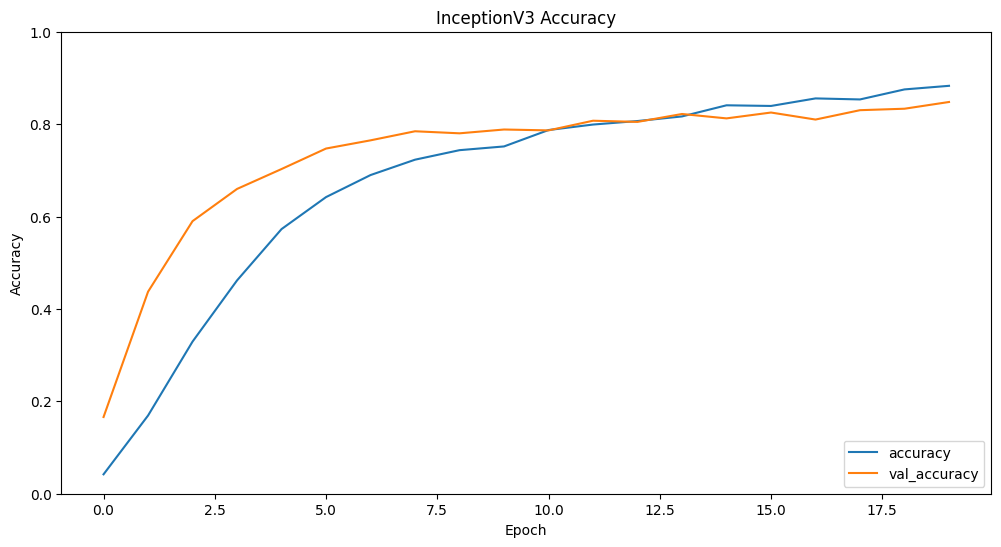

50/50 [==============================] - 5s 67ms/step


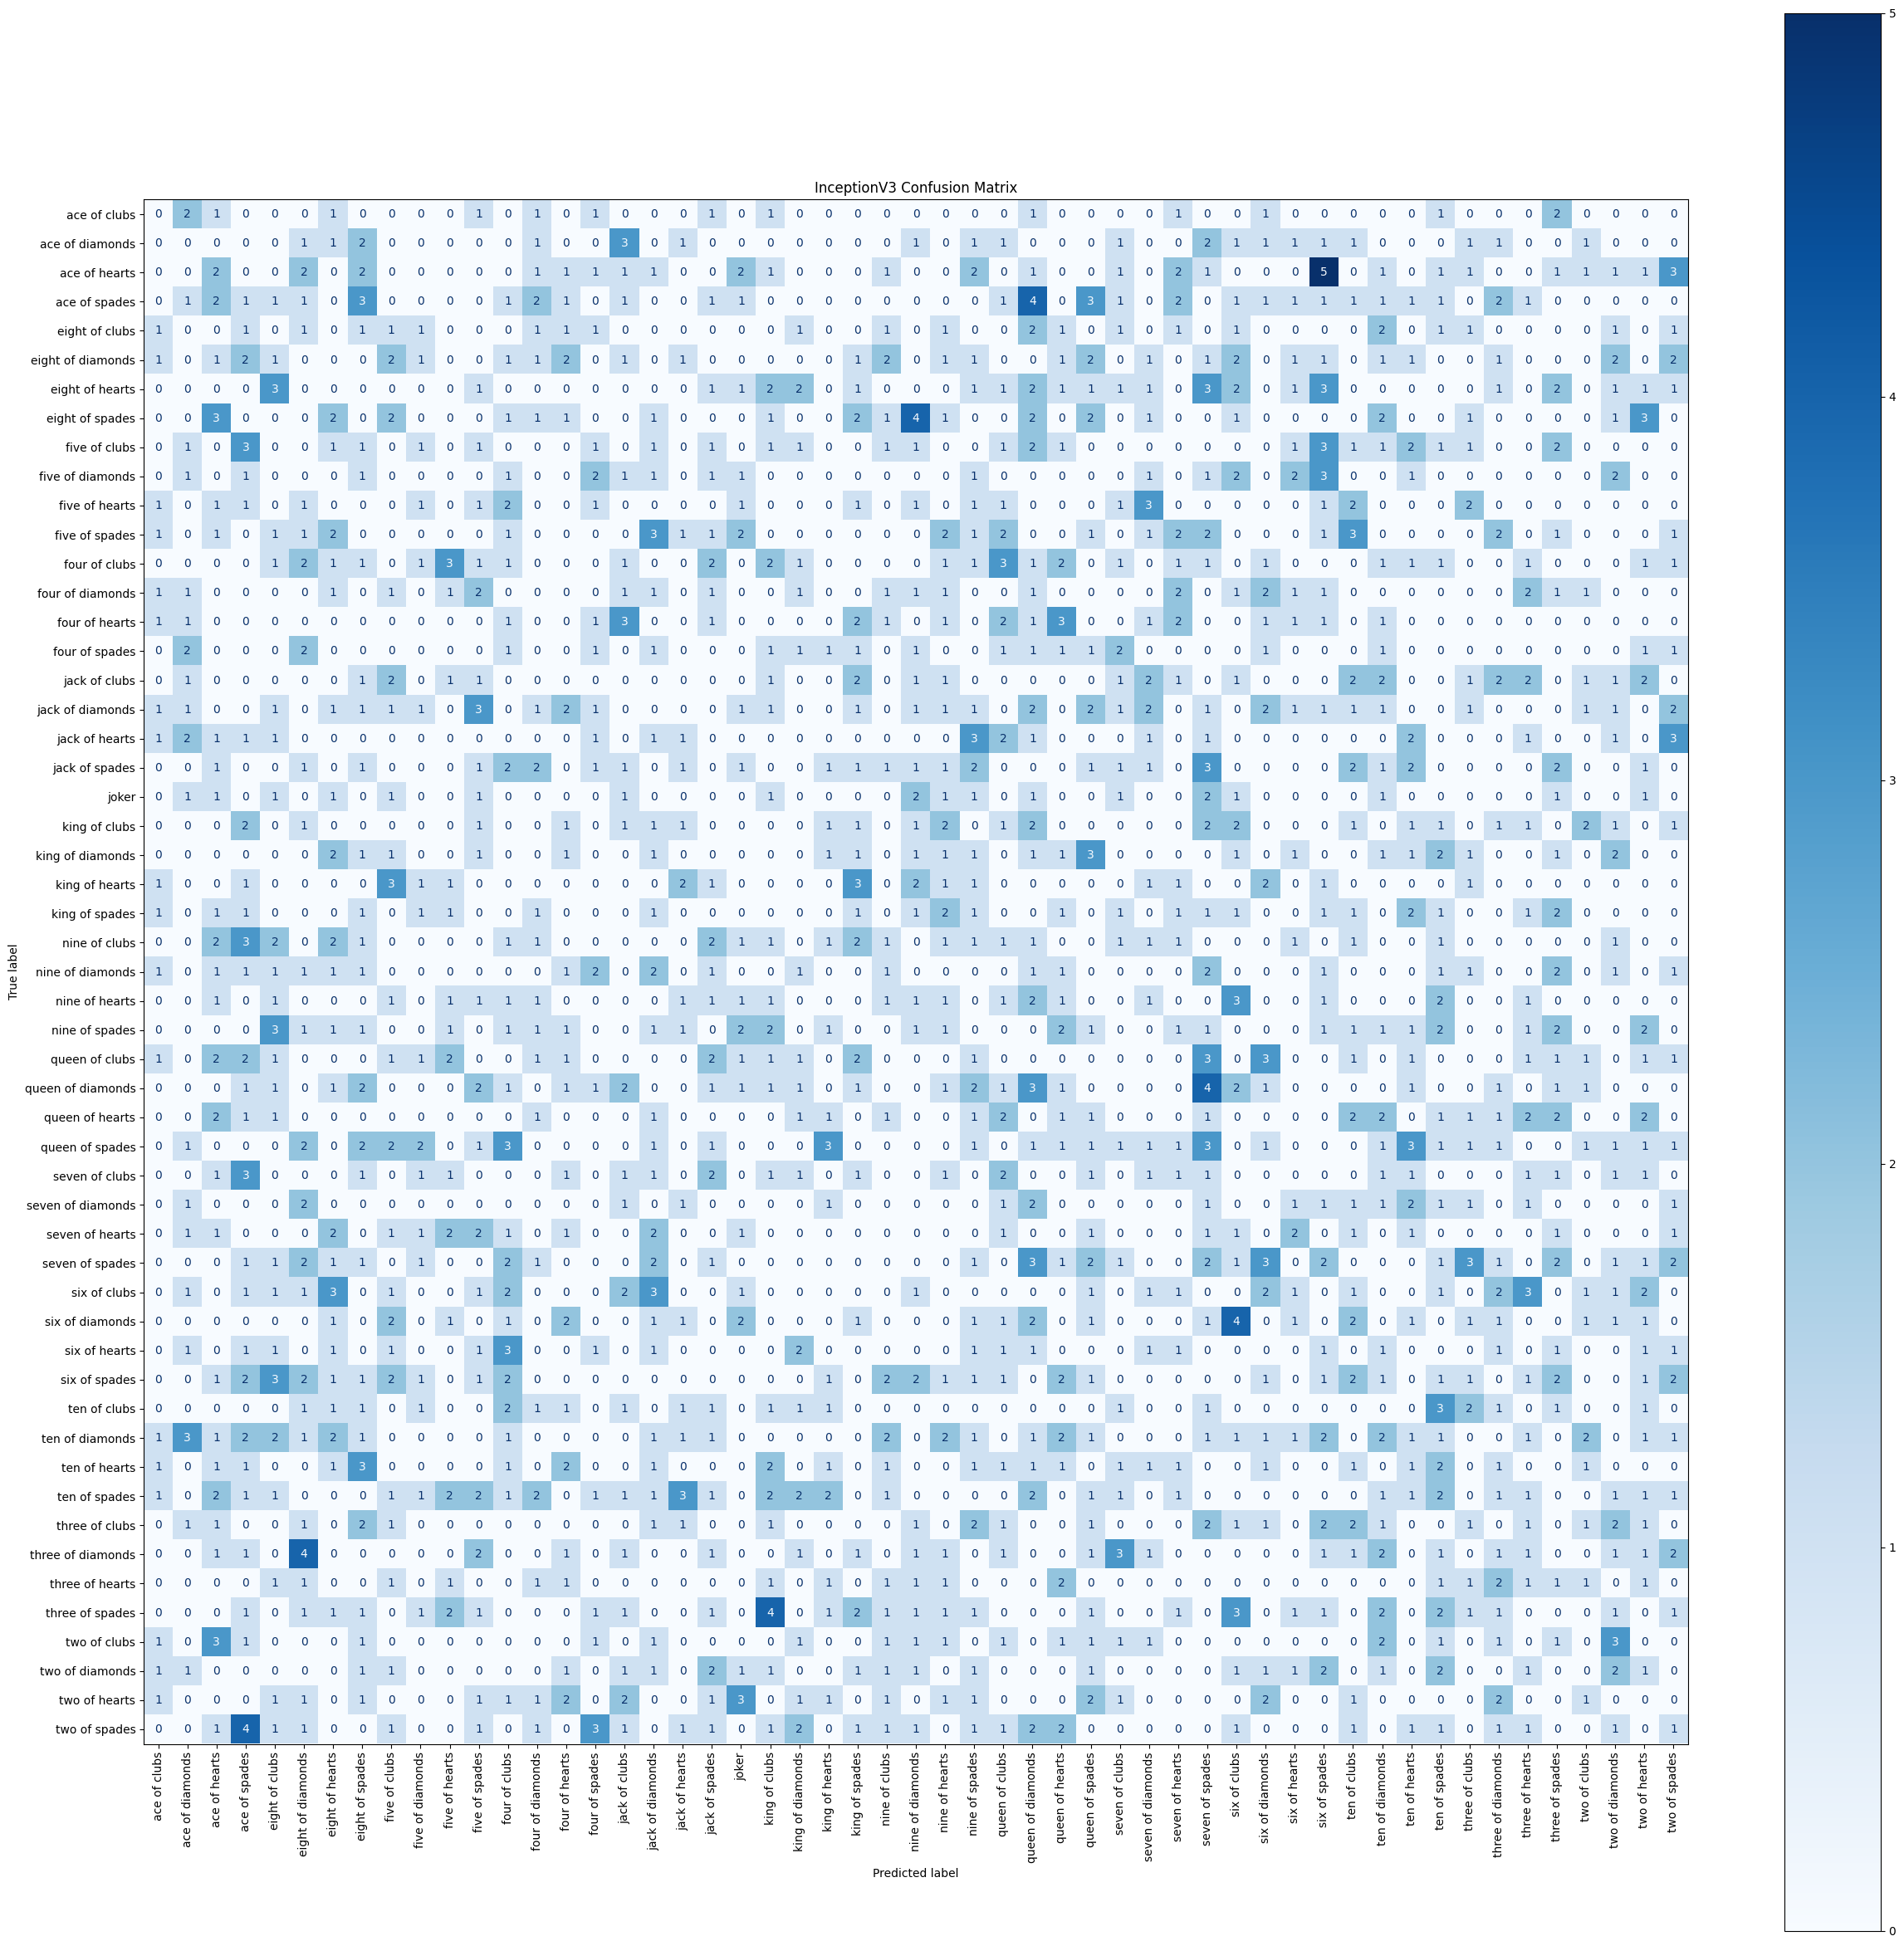

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved InceptionV3 model to saved_models/InceptionV3_saved.h5


In [ ]:
base_models2 = [
  (InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3)), (299, 299, 3), 'InceptionV3')
]
model_training (base_models2)

83683744/83683744 [==============================] - 1s 0us/step
Training Xception...
Epoch 1/20
198/198 [==============================] - 159s 647ms/step - loss: 3.7338 - accuracy: 0.0651 - val_loss: 2.9554 - val_accuracy: 0.1831
Epoch 2/20
198/198 [==============================] - 122s 616ms/step - loss: 2.7738 - accuracy: 0.2323 - val_loss: 1.8508 - val_accuracy: 0.4823
Epoch 3/20
198/198 [==============================] - 123s 622ms/step - loss: 2.0445 - accuracy: 0.4104 - val_loss: 1.2057 - val_accuracy: 0.6553
Epoch 4/20
198/198 [==============================] - 123s 621ms/step - loss: 1.5189 - accuracy: 0.5755 - val_loss: 0.9316 - val_accuracy: 0.7364
Epoch 5/20
198/198 [==============================] - 122s 617ms/step - loss: 1.1915 - accuracy: 0.6720 - val_loss: 0.7779 - val_accuracy: 0.7896
Epoch 6/20
198/198 [==============================] - 123s 619ms/step - loss: 0.9435 - accuracy: 0.7401 - val_loss: 0.6259 - val_accuracy: 0.8270
Epoch 7/20
198/198 [==================

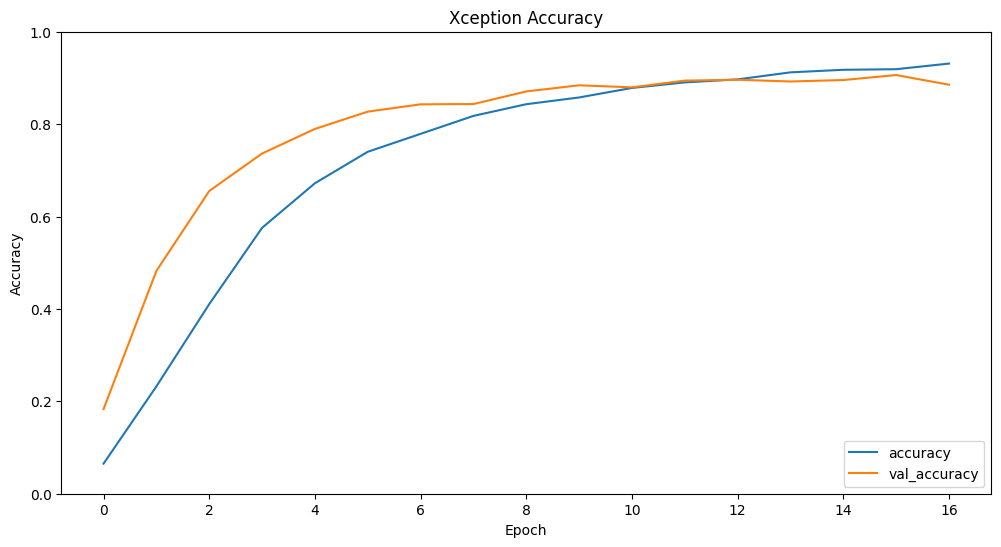

50/50 [==============================] - 8s 145ms/step


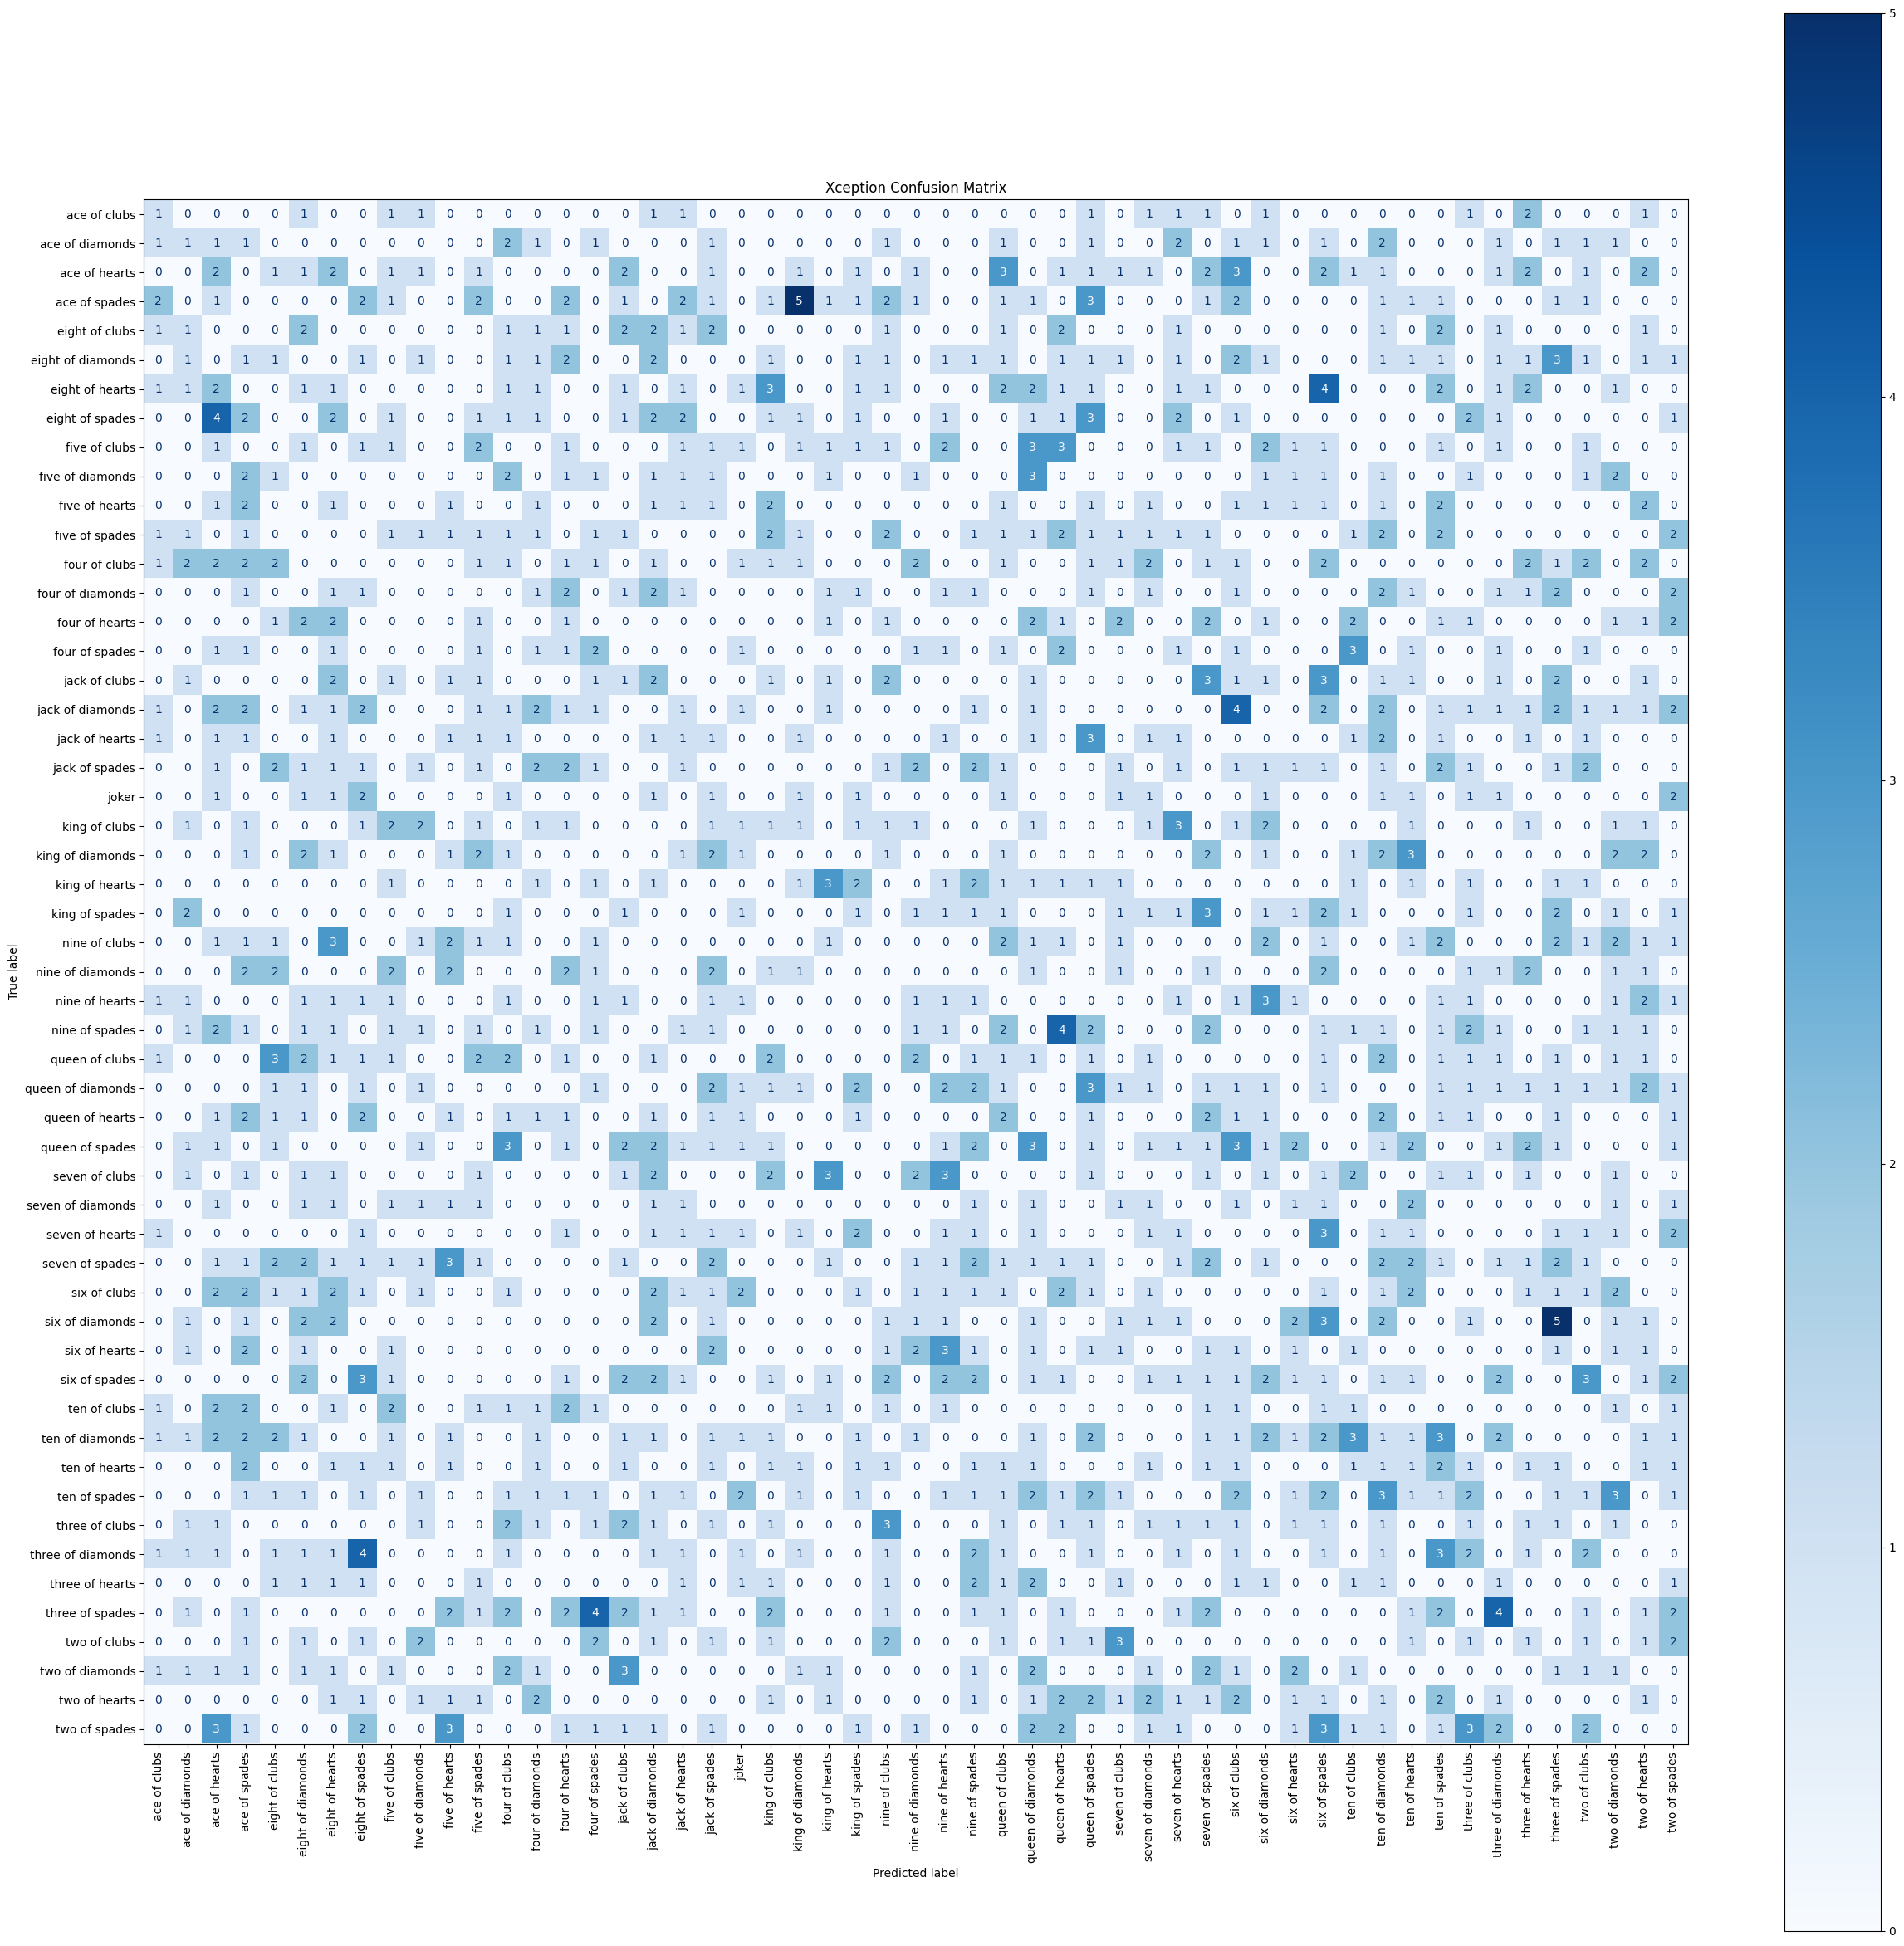

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved Xception model to saved_models/Xception_saved.h5


In [ ]:
base_models3 = [
  (Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3)), (299, 299, 3), 'Xception')
]
model_training (base_models3)

94668760/94668760 [==============================] - 1s 0us/step
Training ResNet50V2...
Epoch 1/20
198/198 [==============================] - 148s 587ms/step - loss: 3.7804 - accuracy: 0.0745 - val_loss: 2.8253 - val_accuracy: 0.2098
Epoch 2/20
198/198 [==============================] - 103s 517ms/step - loss: 2.8910 - accuracy: 0.2291 - val_loss: 2.0293 - val_accuracy: 0.4271
Epoch 3/20
198/198 [==============================] - 103s 519ms/step - loss: 2.2651 - accuracy: 0.3825 - val_loss: 1.6118 - val_accuracy: 0.5349
Epoch 4/20
198/198 [==============================] - 103s 518ms/step - loss: 1.8069 - accuracy: 0.5158 - val_loss: 1.1934 - val_accuracy: 0.6926
Epoch 5/20
198/198 [==============================] - 103s 517ms/step - loss: 1.5261 - accuracy: 0.5980 - val_loss: 1.0629 - val_accuracy: 0.7250
Epoch 6/20
198/198 [==============================] - 102s 516ms/step - loss: 1.3326 - accuracy: 0.6454 - val_loss: 0.9934 - val_accuracy: 0.7408
Epoch 7/20
198/198 [================

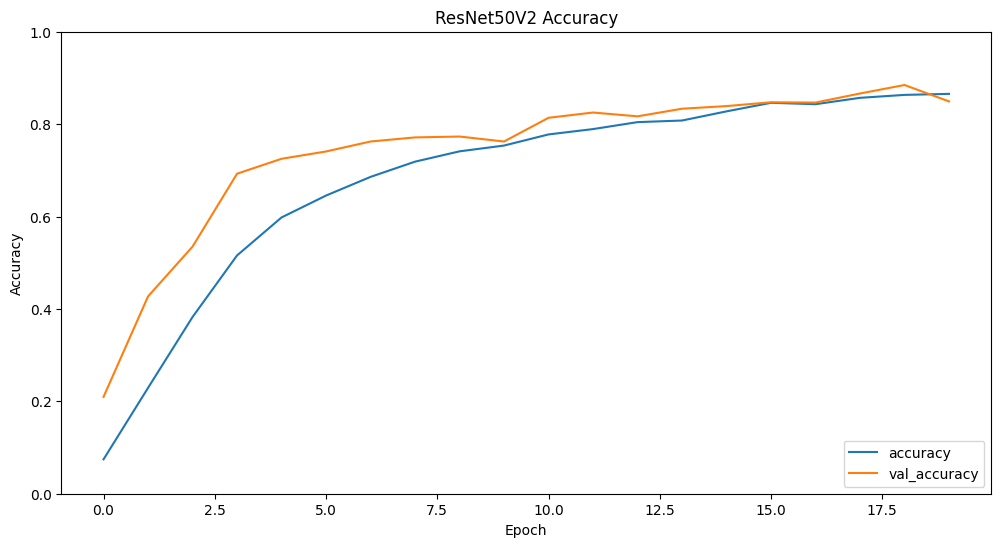

50/50 [==============================] - 5s 86ms/step


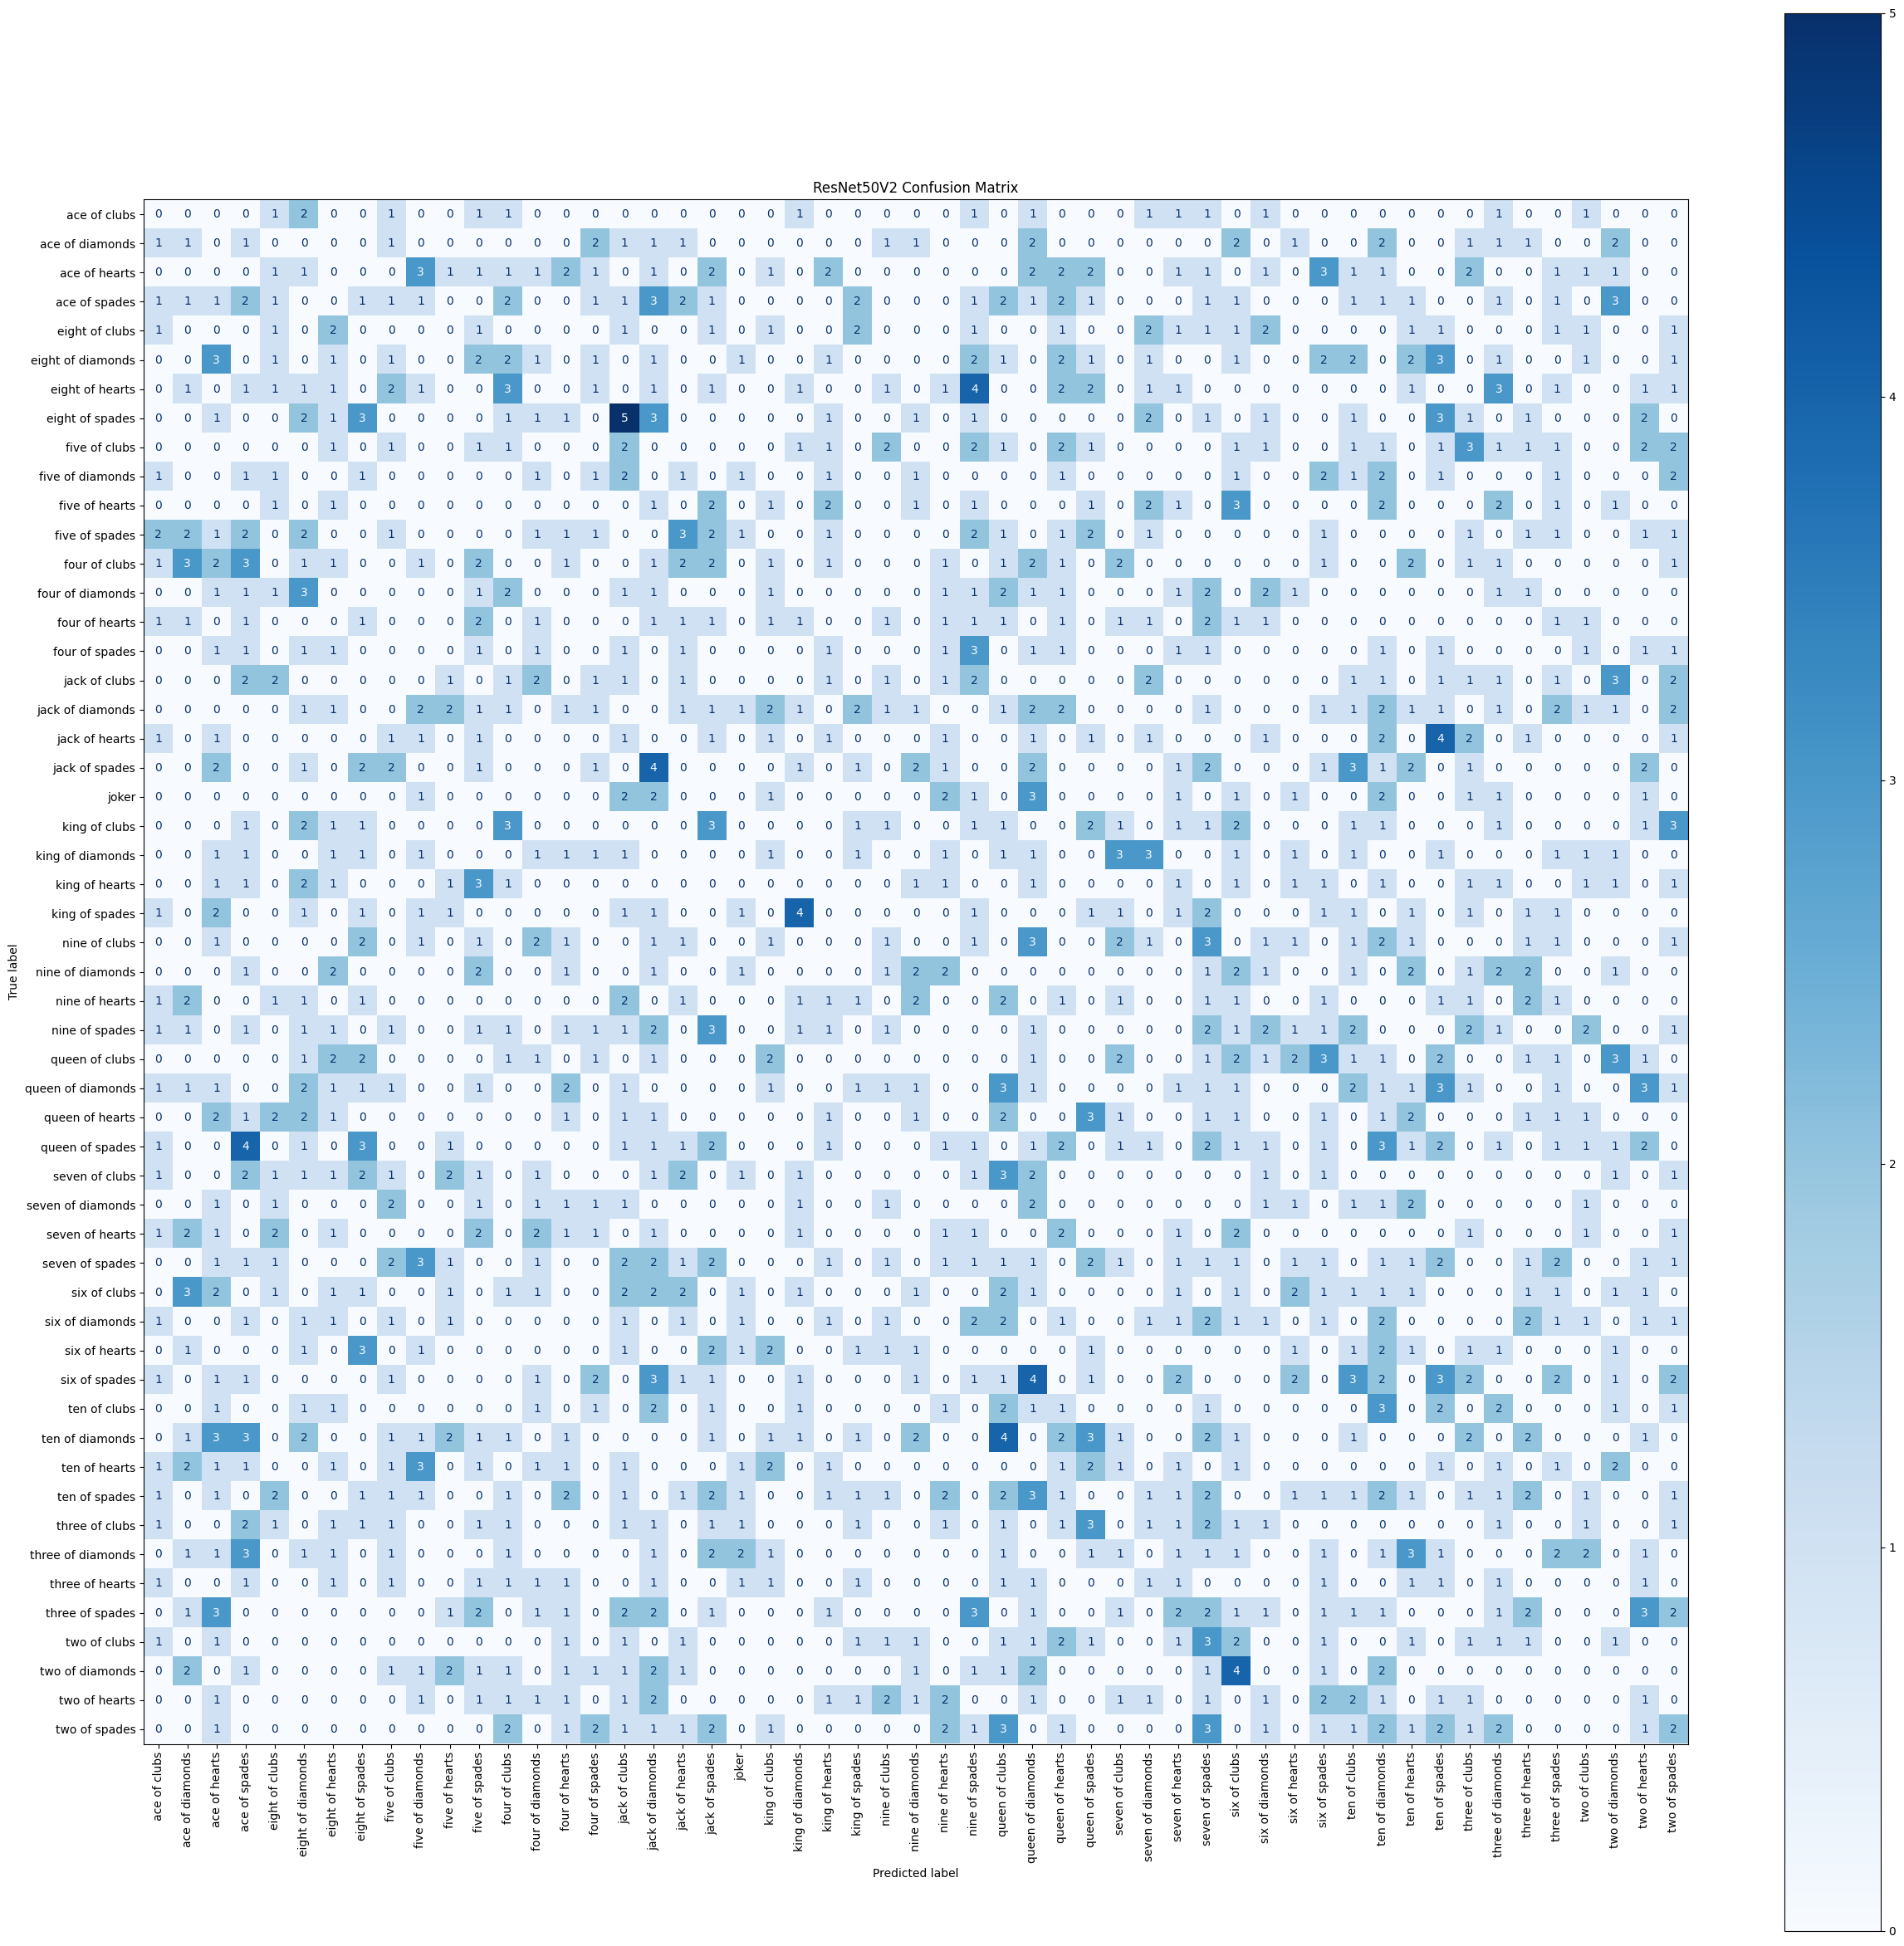

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved ResNet50V2 model to saved_models/ResNet50V2_saved.h5


In [ ]:
base_models4 = [
  (ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'ResNet50V2')
]
model_training (base_models4)

29084464/29084464 [==============================] - 2s 0us/step
Training DenseNet121...
Epoch 1/20
198/198 [==============================] - 203s 625ms/step - loss: 3.9326 - accuracy: 0.0539 - val_loss: 3.1006 - val_accuracy: 0.2117
Epoch 2/20
198/198 [==============================] - 111s 558ms/step - loss: 3.1426 - accuracy: 0.1629 - val_loss: 2.0789 - val_accuracy: 0.4455
Epoch 3/20
198/198 [==============================] - 111s 562ms/step - loss: 2.5493 - accuracy: 0.2782 - val_loss: 1.5803 - val_accuracy: 0.5152
Epoch 4/20
198/198 [==============================] - 111s 559ms/step - loss: 2.0813 - accuracy: 0.3945 - val_loss: 1.1541 - val_accuracy: 0.6946
Epoch 5/20
198/198 [==============================] - 109s 549ms/step - loss: 1.7152 - accuracy: 0.5044 - val_loss: 0.9047 - val_accuracy: 0.7548
Epoch 6/20
198/198 [==============================] - 109s 552ms/step - loss: 1.4008 - accuracy: 0.5967 - val_loss: 0.7036 - val_accuracy: 0.8156
Epoch 7/20
198/198 [===============

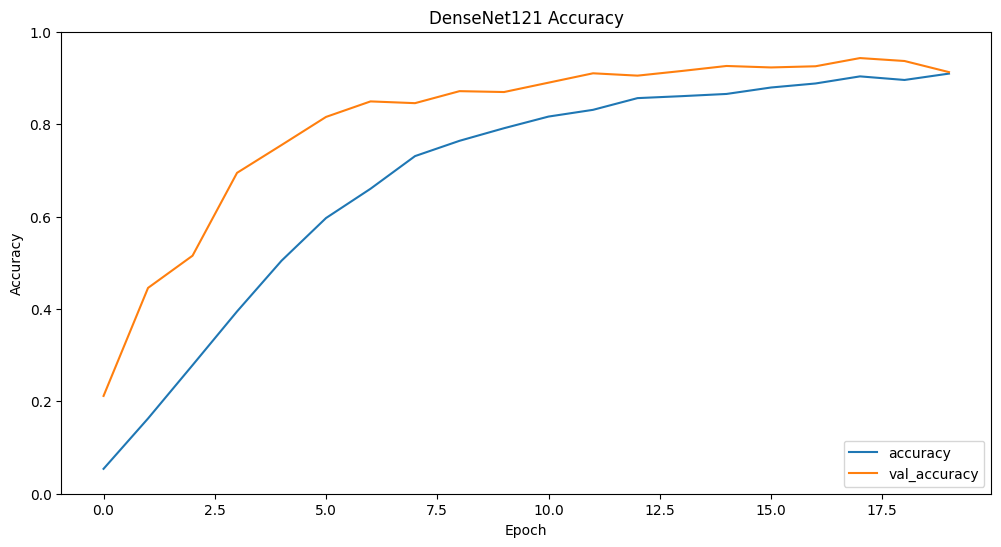

50/50 [==============================] - 7s 95ms/step


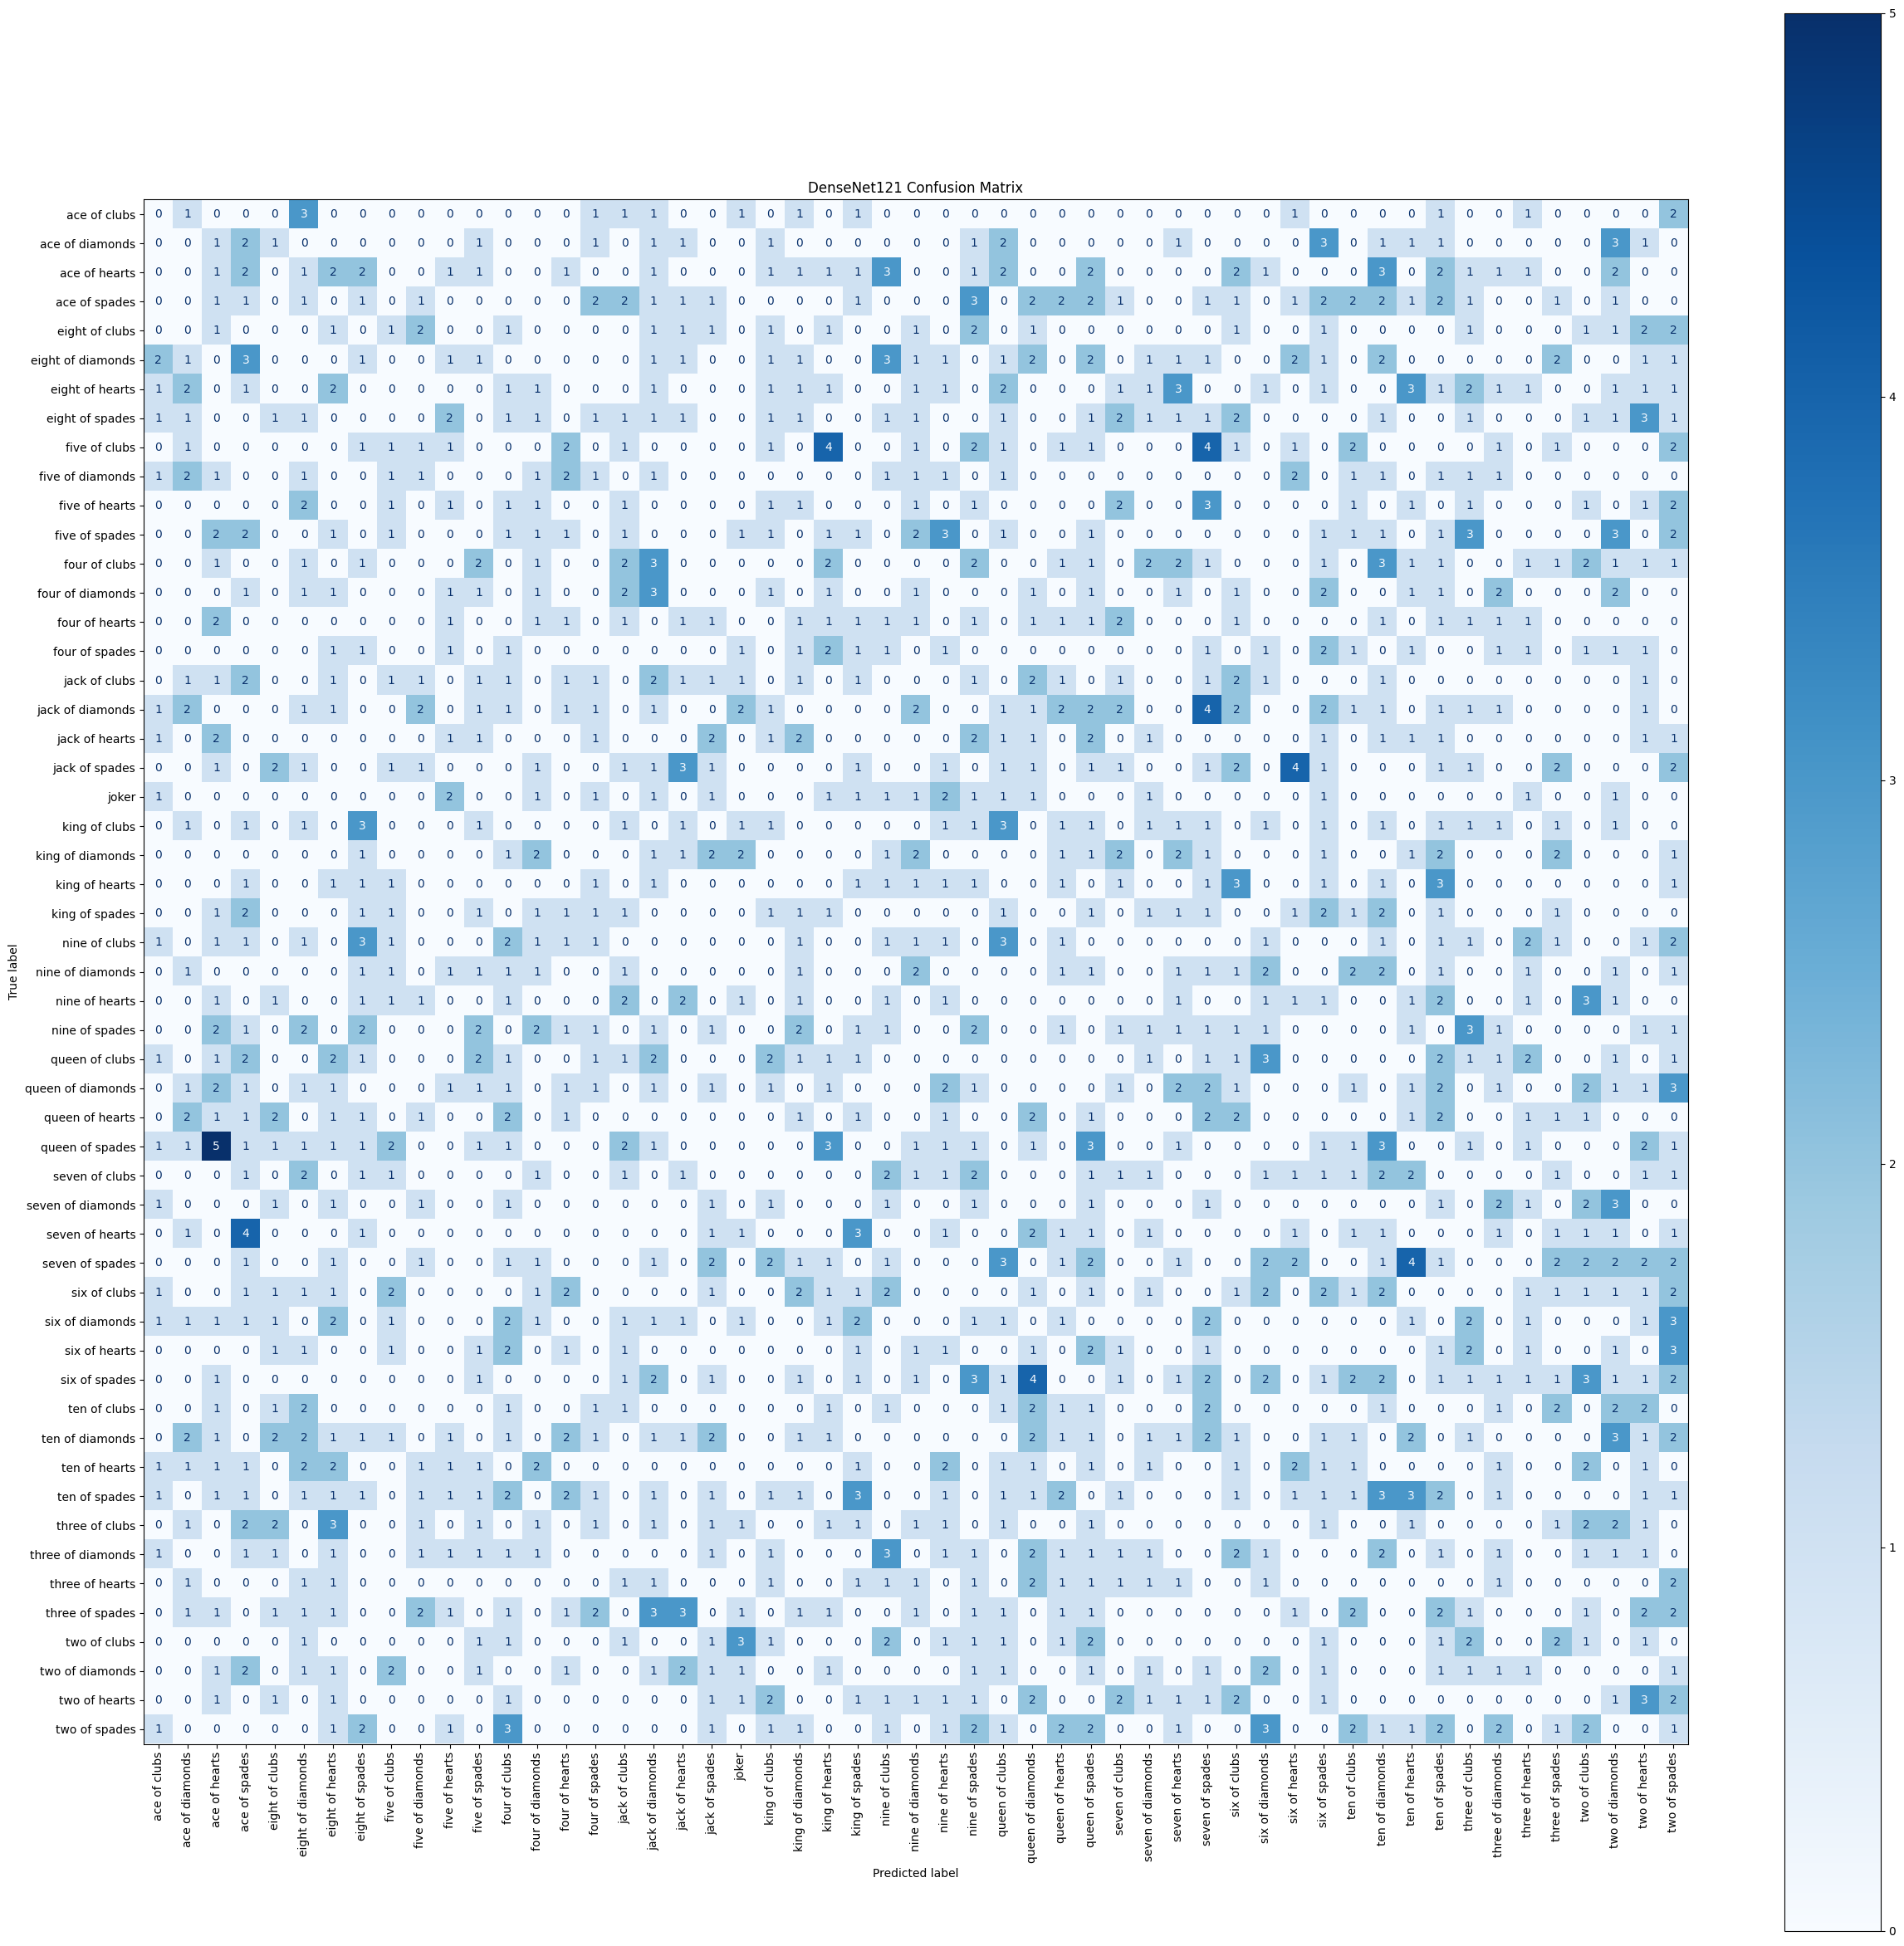

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved DenseNet121 model to saved_models/DenseNet121_saved.h5


In [12]:
# List of base models with their respective input shapes
base_models5 = [
   (DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'DenseNet121')
]
model_training (base_models5)

# Testing and labeling unseen data

In [13]:
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing import image

# Load test dataset
test_df = pd.read_csv('/content/cards-image-dataset/test_data.csv')

# Load class indices (assuming you have train_generator with class indices saved)
class_indices_inverse = {v: k for k, v in train_generator.class_indices.items()}

# Directory containing the saved models
model_dir = '/content/saved_models'

# Define batch size
batch_size = 32

# Function to process images in batches
def process_images_in_batches(image_paths, model, target_size, batch_size):
    num_images = len(image_paths)
    num_batches = (num_images + batch_size - 1) // batch_size  # Calculate number of batches

    all_predictions = []

    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, num_images)
        batch_paths = image_paths[start_idx:end_idx]

        batch_images = []
        for img_path in batch_paths:
            img = image.load_img(img_path, target_size=target_size)
            img = image.img_to_array(img)
            img = img / 255.0
            batch_images.append(img)

        batch_images = np.array(batch_images)
        batch_predictions_probs = model.predict(batch_images)
        batch_predictions = np.argmax(batch_predictions_probs, axis=1)

        all_predictions.extend(batch_predictions)

    return all_predictions

# Iterate over each model file in the directory
for model_file in os.listdir(model_dir):
    if model_file.endswith('.h5'):
        # Load the model
        model_path = os.path.join(model_dir, model_file)
        model = load_model(model_path)

        # Determine target size based on model
        if "Xception_saved" in model_file or "InceptionV3_saved" in model_file:
            target_size = (299, 299)
        else:
            target_size = (224, 224)

        # Process images in batches and make predictions
        image_paths = test_df['Image_Path'].tolist()
        prediction = process_images_in_batches(image_paths, model, target_size, batch_size)

        # Map predictions to class labels
        prediction_labels = [class_indices_inverse[label] for label in prediction]

        # Create a DataFrame with predictions
        predicted_df = pd.DataFrame({
            'Image_Path': test_df['Image_Path'],
            'Label': prediction_labels,
        })

        # Save predictions to CSV
        csv_path = f'/content/saved_models/predicted_{model_file.split(".")[0]}.csv'
        predicted_df.to_csv(csv_path, header=True, index=False)

        print(f"Predictions saved to {csv_path}")

1/1 [==============================] - 6s 6s/step
Predictions saved to /content/saved_models/predicted_DenseNet121_saved.csv


# image label and prediction and visualization

Predictions using: predicted_MobileNetV2_saved


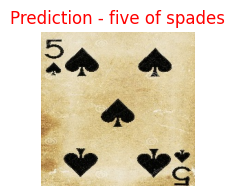

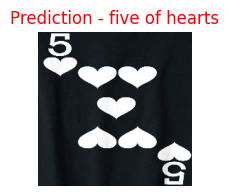

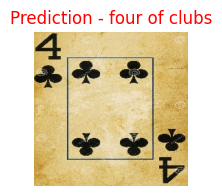

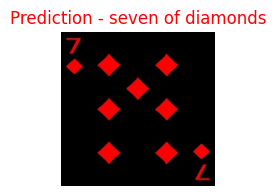

Predictions using: predicted_ResNet50V2_saved


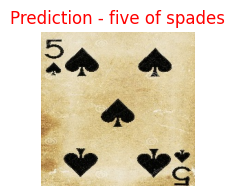

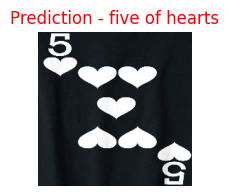

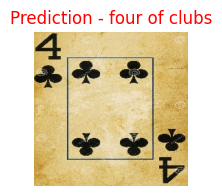

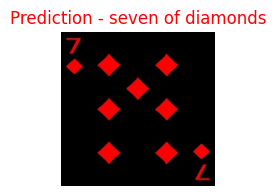

Predictions using: predicted_Xception_saved


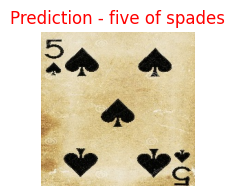

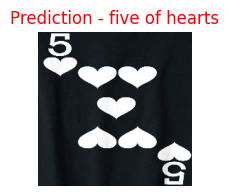

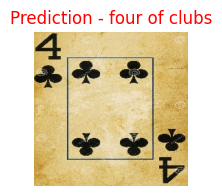

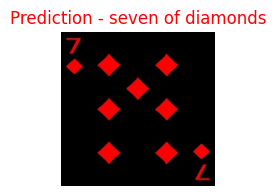

Predictions using: predicted_InceptionV3_saved(1)


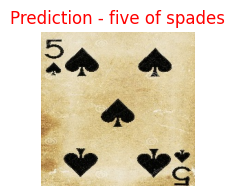

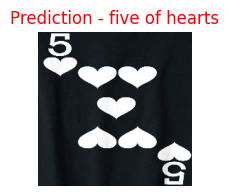

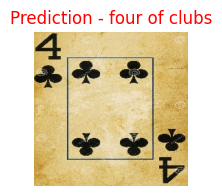

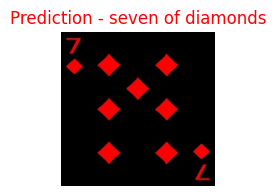

Predictions using: predicted_DenseNet121_saved


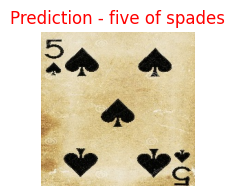

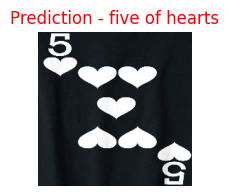

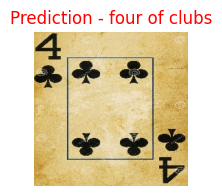

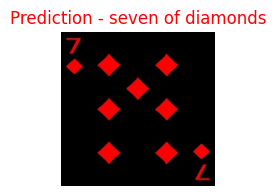

In [15]:
import csv
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Example usage
filenames = [
    '/content/cards-image-dataset/test/five of spades/5.jpg',
    '/content/cards-image-dataset/test/five of hearts/1.jpg',
    '/content/cards-image-dataset/test/four of clubs/3.jpg',
    '/content/cards-image-dataset/test/seven of diamonds/3.jpg'
]

def load_predicted_labels(csv_file_path):
    predicted_labels = {}
    with open(csv_file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            predicted_labels[row['Image_Path']] = row['Label']
    return predicted_labels

def visualize_predictions(filenames, predicted_labels):
    for filename in filenames:
        img = image.load_img(filename, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_processed = img_array / 255.0  # Normalize the image

        # Check if the filename is in predicted_labels
        if filename in predicted_labels:
            predicted_class_name = predicted_labels[filename]
        else:
            print(f"Filename not found: {filename}")
            predicted_class_name = "Unknown"  # Handle cases where filename not found

        plt.figure(figsize=(2, 2))
        plt.imshow(img_processed)  # Display the processed image
        plt.title(f"Prediction - {predicted_class_name}", size=12, color='red')
        plt.axis('off')  # Hide axes
        plt.show()

# Directory containing the predicted CSV files
csv_dir = '/content/saved_models'

# Iterate over each CSV file in the directory
for csv_file in os.listdir(csv_dir):
    if csv_file.startswith('predicted_') and csv_file.endswith('.csv'):
        # Determine the model name
        model_name = csv_file.split('.')[0]

        # Path to the CSV file containing predictions for the current model
        predicted_csv_file = os.path.join(csv_dir, csv_file)

        # Load predicted labels from the CSV file
        predicted_labels = load_predicted_labels(predicted_csv_file)

        # Predict and plot images using predicted labels
        print(f"Predictions using: {model_name}")
        visualize_predictions(filenames, predicted_labels)
